## Advertising Dataset : Linear Regression and Model Assumption 

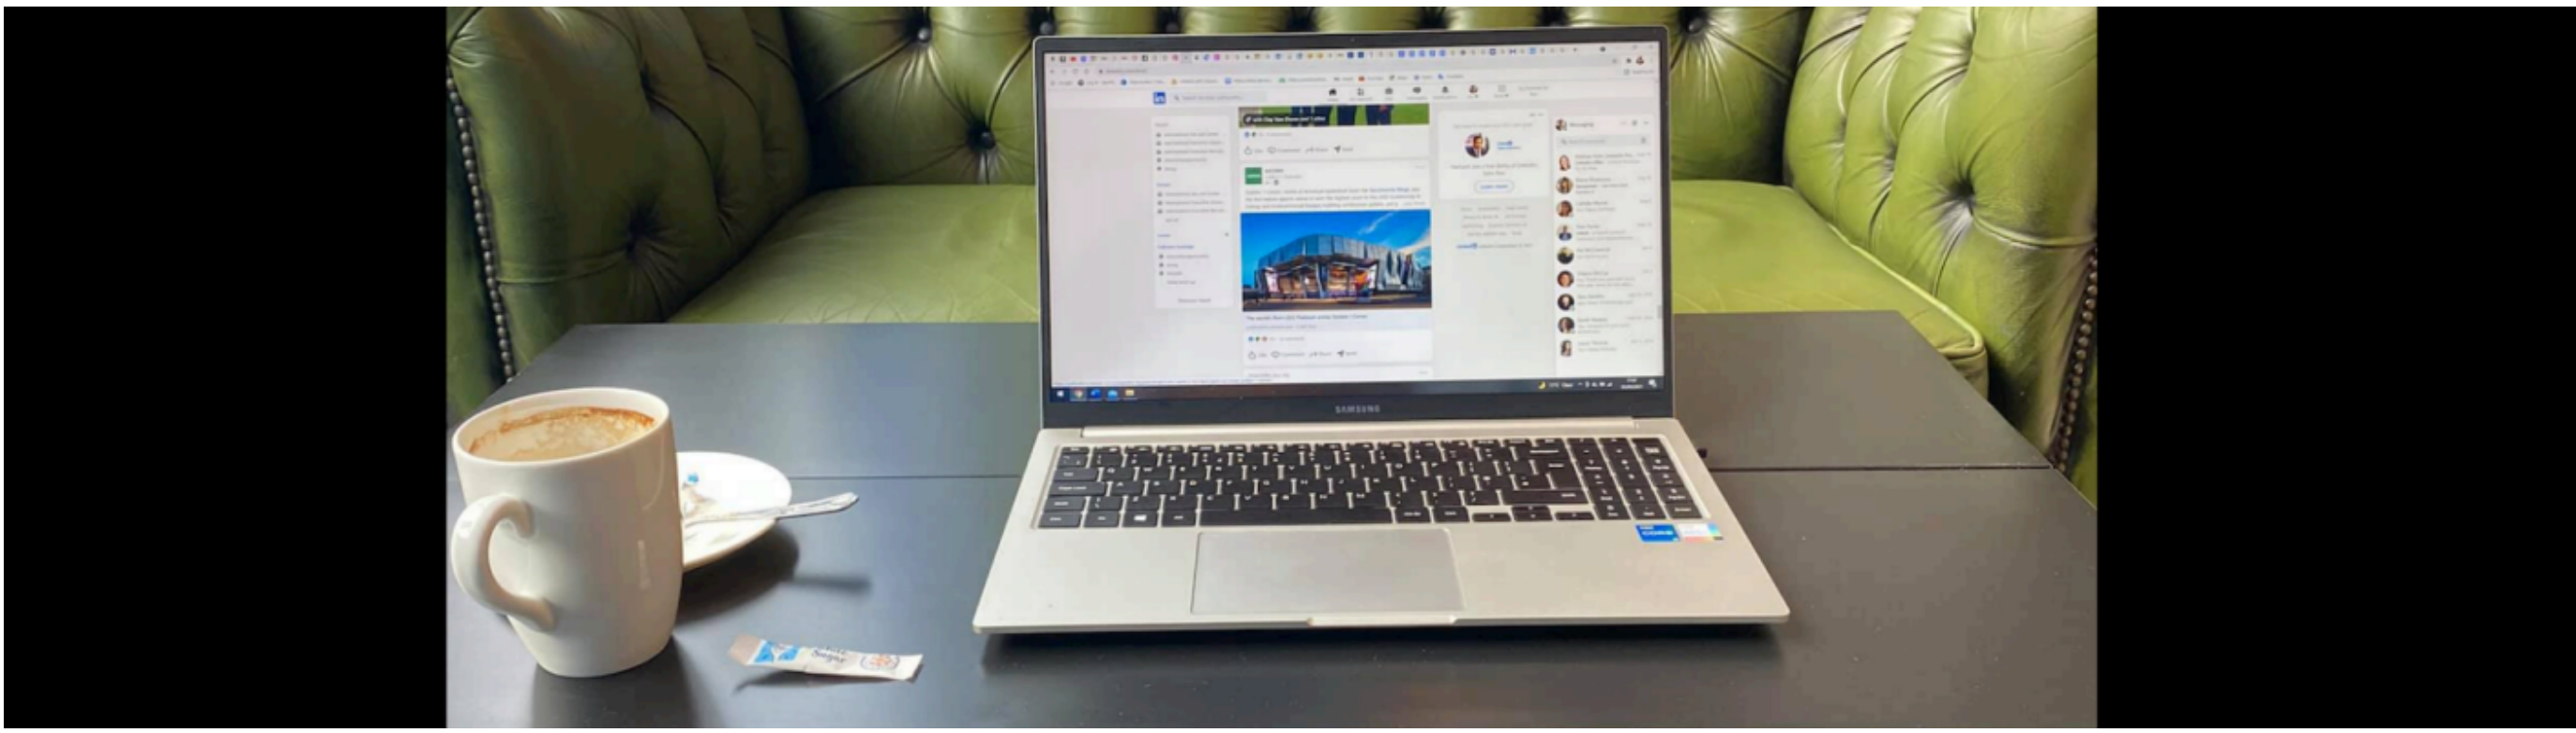

### HEMANT THAPA

### Table of Content

1. Introduction 
2. Pre Processing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Selection
6. Predictive Analysis (Best Fit Line)
7. R Squared
8. Cost Function
9. Gradient Descent
10. Model Assumption
11. Conclusion 

### 1. Loading Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

#### What is a Linear Regression Model?

Linear regression is a statistical method used for predictive modeling. It's one of the simplest and most widely used techniques in statistics, particularly useful when there's a linear relationship between the independent and dependent variables.

Dependent Variable (Y): This is what you're trying to predict or explain. In the context of the advertising.csv dataset, Sales would be the dependent variable.

Independent Variables (X): These are the variables you believe have an effect on your dependent variable. In the same dataset, TV, Radio, and Newspaper advertising budgets are the independent variables.

#### Linear Equation

The relationship in linear regression is modeled through a linear equation:

#### Y = β0 + β1X1 + β2X2 + ... + βnXn + ε



- Dependent Variable (Y): This is what we aim to predict or explain. For example, 'Sales' in a sales analysis context.

- Independent Variables (X1, X2, ..., Xn): These are the predictors. In a marketing context, they could be advertising spends like TV, Radio, and Newspaper.

- Intercept (β0): A constant term, representing the value of Y when all Xs are zero. It's the baseline from which the influence of independent variables is measured.

- Coefficients (β1, β2, ..., βn): Each coefficient indicates the change in Y for a unit change in its corresponding X, holding all other variables constant. They show the strength and direction of the relationship between each independent variable and the dependent variable.

- Error Term (ε): It captures the difference between predicted values and actual values, acknowledging the element of uncertainty or other factors not accounted for in the model.

#### Why Linear Regression?

Linear regression’s simplicity and interpretability make it a go-to method for many analysts and researchers. It’s not just about finding a line that best fits the data; it’s about understanding how different factors collectively and individually influence an outcome. This understanding paves the way for better decision-making and more accurate predictions.

#### Model Assumption

- Linearity: The relationship between the independent variables and the dependent variable should be linear. You can check this assumption by looking at scatter plots of your independent variables (TV, radio, newspaper) against the dependent variable (sales).

- Normality: The residuals (errors) of the model should be normally distributed. This can be checked using a histogram or a Q-Q plot of the model residuals.

- Homoscedasticity: The residuals should have constant variance. This can be checked with a scatter plot of the residuals against the predicted values.

- Independence: The residuals should be independent. Autocorrelation can be tested using the Durbin-Watson statistic, which is typically part of regression output in statistical software.

- No Multicollinearity: In multiple regression, ensure that the independent variables are not highly correlated with each other. This can be checked using a correlation matrix or Variance Inflation Factor (VIF).

### 2. Loading Dataset

In [13]:
df = pd.read_csv('advertising.csv')
df[:5]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 3. Pre Processing 

In [15]:
df.size

800

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [18]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [19]:
df.columns = df.columns.str.lower()

In [20]:
df.columns

Index(['tv', 'radio', 'newspaper', 'sales'], dtype='object')

In [21]:
df[:5]

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 4. Descriptive Statistics

In [23]:
df.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


- Count: This is the number of observations (or entries) for each variable. For all four variables (TV, radio, newspaper, sales), there are 200 observations each. This implies no missing values in any of the columns.


- Mean: The average value of each variable. 

-- The average budget spent on TV advertising is approximately 147.04 units.

-- The average budget spent on radio advertising is about 23.26 units.

-- The average budget spent on newspaper advertising is around 30.55 units.

-- The average sales amount to about 15.13 units.

- Standard Deviation (std) : Measures the amount of variation or dispersion of a set of values.

- TV: A standard deviation of 85.85 suggests a wide dispersion in TV advertising budgets.

- Radio: A standard deviation of 14.85 indicates a moderately wide spread in radio advertising budgets.

- Newspaper: A standard deviation of 21.78 points to a moderately wide spread in newspaper advertising budgets

- Sales: A standard deviation of 5.28 indicates the spread around the average sales figure.


- Minimum (min) : The smallest value in each column.

-- TV: The lowest budget for TV advertising is 0.7 units.

-- Radio: The lowest budget for radio advertising is 0.0 units, suggesting that some campaigns had no radio advertising.

-- Newspaper: The lowest budget for newspaper advertising is 0.3 units.

-- Sales: The lowest sales figure is 1.6 units.

- Percentiles (25%, 50%, 75%) : These values indicate the distribution of the data.

- 25% (1st Quartile): 25% of the data is below this value

-- 25% of the TV budgets are below 74.38 units.

-- 25% of the radio budgets are below 9.98 units.

-- 25% of the newspaper budgets are below 12.75 units.

-- 25% of the sales figures are below 11.00 units.

- 50% (Median): Half of the data is below this value.

-- The median TV budget is 149.75 units.

-- The median radio budget is 22.9 units.

-- The median newspaper budget is 25.75 units.

-- The median sales figure is 16.00 units.

- 75% (3rd Quartile): 75% of the data is below this value.

-- 75% of the TV budgets are below 218.83 units.

-- 75% of the radio budgets are below 36.53 units.

-- 75% of the newspaper budgets are below 45.10 units.

-- 75% of the sales figures are below 19.05 units.

- Maximum (max)

-- The largest value in each dataset columns.

-- The highest budget for TV advertising is 296.4 units.

-- The highest budget for radio advertising is 49.6 units.

-- The highest budget for newspaper advertising is 114.0 units.

-- The highest sales figure is 27.0 units.


### 4. Exploratory Data Analysis (EDA)

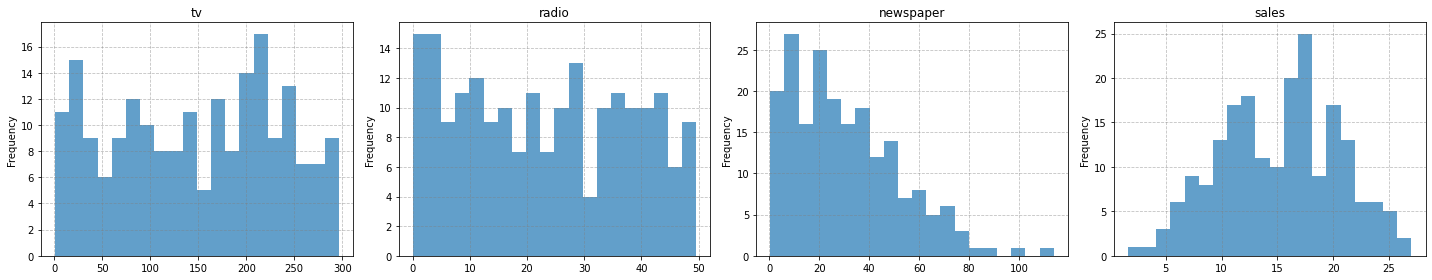

In [31]:
#histograms for each variable
plt.figure(figsize=(20, 4))
for i, col in enumerate(['tv', 'radio', 'newspaper', 'sales']):
    plt.subplot(1, 4, i+1)
    df[col].plot(kind='hist', bins=20, alpha=0.7)
    plt.title(f'{col}')
    plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.show()

- TV: The distribution of TV advertising budgets appears to be fairly uniform across different spend levels, with slight peaks around 50-75 and 200-225 units. This suggests that the advertising budget for TV is spread across a range of values without any single spend level dominating.

- Radio: Radio advertising budgets show a bit more concentration at the lower spend levels, with a higher frequency of campaigns having lower budgets. The frequency gradually decreases as the budget amount increases.

- Newspaper: Newspaper advertising budgets seem to be skewed to the right, with a higher frequency of lower spend levels and a long tail extending towards higher spend levels. There's a noticeable peak around 25-30 units, indicating that many campaigns have a budget within this range.

- Sales: The sales histogram shows a bimodal distribution with two peaks, one around 10 units and another around 16-18 units. This suggests that there are two common levels at which sales tend to cluster.

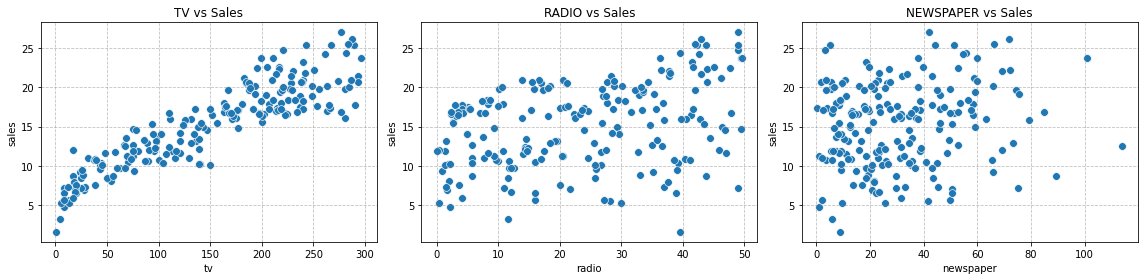

In [33]:
plt.figure(figsize=(16, 4))
for i, col in enumerate(['tv', 'radio', 'newspaper']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[col], y=df['sales'], s=60)
    plt.title(f'{col.upper()} vs Sales')
    plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.show()

- TV vs Sales: This plot shows a positive linear relationship between TV advertising budgets and sales. As the budget for TV advertising increases, sales also tend to increase. The points are more closely clustered around a line that goes from the bottom left to the top right, indicating a strong correlation between TV advertising and sales.

- Radio vs Sales: The scatter plot for radio advertising budgets versus sales also indicates a positive relationship, but the points are more dispersed compared to the TV scatter plot. This suggests that while there is a positive association between radio advertising and sales, the relationship is not as strong or as consistent as with TV advertising.

- Newspaper vs Sales: The relationship between newspaper advertising budgets and sales appears to be the weakest among the three. The points are widely scattered, and there is no clear pattern that indicates a strong linear relationship. This suggests that newspaper advertising might have the least impact on sales or that the relationship is not linear.

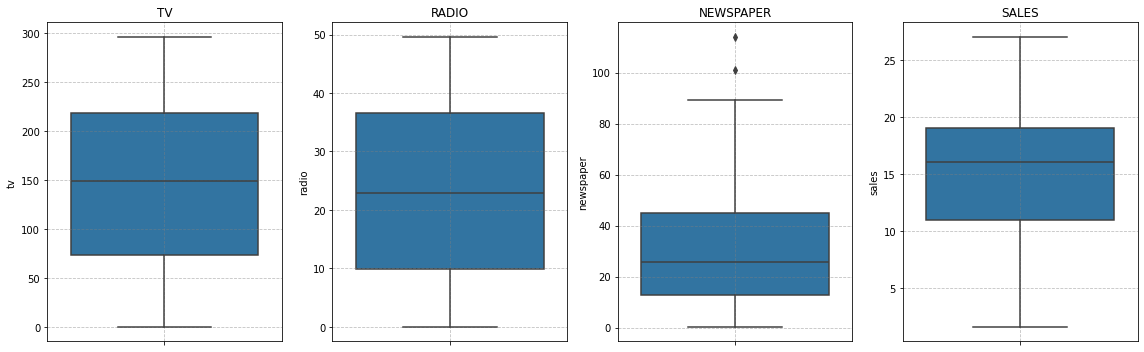

In [35]:
#box plots for each variable
plt.figure(figsize=(16, 5))
for i, col in enumerate(['tv', 'radio', 'newspaper', 'sales']):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'{col.upper()}')
    plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.show()

- TV Box Plot: The TV advertising budget has a median around 150 units, with the middle 50% of the data (the interquartile range or IQR) spanning from approximately 75 to 225 units. The whiskers extend to the minimum and maximum values that are not considered outliers, close to 0 and 300 units, respectively. There are no visible outliers, indicating that all TV advertising budgets are within a reasonable range of values.

- Radio Box Plot: The median radio advertising budget is around 23 units, with the IQR from about 10 to just over 35 units. The whiskers extend from almost 0 to just below 50 units. Similar to TV, there are no apparent outliers, suggesting a fairly even distribution of advertising budgets for radio.

- Newspaper Box Plot: The median budget for newspaper advertising is lower than for TV and radio, lying around 25 units. The IQR is from approximately 10 to 45 units. However, unlike the TV and Radio box plots, the Newspaper box plot shows several outliers above the upper whisker, indicating there are some instances of unusually high newspaper advertising budgets relative to the rest of the data.

- Sales Box Plot: Sales have a median value of approximately 16 units, with the IQR between about 11 and 19 units. The whiskers extend from around 5 to 27 units. There are no outliers visible in the sales data.

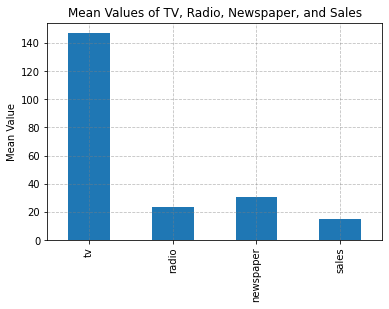

In [37]:
#chart for mean values of each variable
mean_values = df.mean()
mean_values.plot(kind='bar')
plt.title('Mean Values of TV, Radio, Newspaper, and Sales')
plt.ylabel('Mean Value')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

- TV: The average advertising budget for TV is significantly higher than for the other media, standing at over 140 units. This suggests that, on average, the most money was spent on TV advertising.
- Radio: The mean value for the radio advertising budget is much lower than TV, around 20 to 30 units, indicating that radio advertising costs less on average than TV advertising.
- Newspaper: The average budget for newspaper advertising is similar to that of radio, also around 20 to 30 units, which is again significantly lower than TV advertising.
- Sales: The mean sales value is depicted to be approximately 15 units. This value is not directly comparable to the advertising budgets because it's a different measure (sales volume or revenue), but it still provides a sense of scale.


In [39]:
#correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                 tv     radio  newspaper     sales
tv         1.000000  0.054809   0.056648  0.901208
radio      0.054809  1.000000   0.354104  0.349631
newspaper  0.056648  0.354104   1.000000  0.157960
sales      0.901208  0.349631   0.157960  1.000000


- TV and Sales: There is a very strong positive correlation of 0.901, suggesting that as the TV advertising budget increases, sales also tend to increase significantly.
- Radio and Sales: There is a moderate positive correlation of 0.349, indicating that an increase in radio advertising budget is moderately associated with an increase in sales.
- Newspaper and Sales: The correlation is positive but weak, at 0.158, which means that the relationship between newspaper advertising budget and sales is less pronounced compared to TV and radio.
- Radio and Newspaper: There is a moderate positive correlation of 0.354, indicating some level of association between the advertising budgets for these two media, but it's not very strong.
- TV and Radio, TV and Newspaper: Both these correlations are very weak (close to 0.055), suggesting that there is no significant linear relationship between TV advertising and the other two media types in terms of budget allocation.

### 5. Removing Outliers

In [42]:
print(df.shape)

(200, 4)


In [43]:
#Z-Scores
z_scores = (df - df.mean()) / df.std()
z_scores.head() 

,tv,radio,newspaper,sales
0,0.967425,0.979066,1.774493,1.319009
1,-1.194379,1.080097,0.667903,-0.895268
2,-1.512360,1.524637,1.779084,-0.592461
3,0.051919,1.214806,1.283185,0.259184
4,0.393196,-0.839507,1.278593,0.524140


In [44]:
#Z-Scores
z_scores = (df - df.mean()) / df.std()

#threshold for identifying outliers
threshold = 3

#outliers - a boolean dataframe where True indicates the presence of an outlier
outliers = (z_scores.abs() > threshold)

In [45]:
z_scores[:5]

,tv,radio,newspaper,sales
0,0.967425,0.979066,1.774493,1.319009
1,-1.194379,1.080097,0.667903,-0.895268
2,-1.512360,1.524637,1.779084,-0.592461
3,0.051919,1.214806,1.283185,0.259184
4,0.393196,-0.839507,1.278593,0.524140


The first few Z-scores for each variable are shown. Z-score with an absolute value greater than 3 is typically considered an outlier. Based on the provided Z-scores, there do not appear to be any extreme outliers within the first few entries of the dataset. However, the complete Z-score dataset would need to be examined to identify all potential outliers.

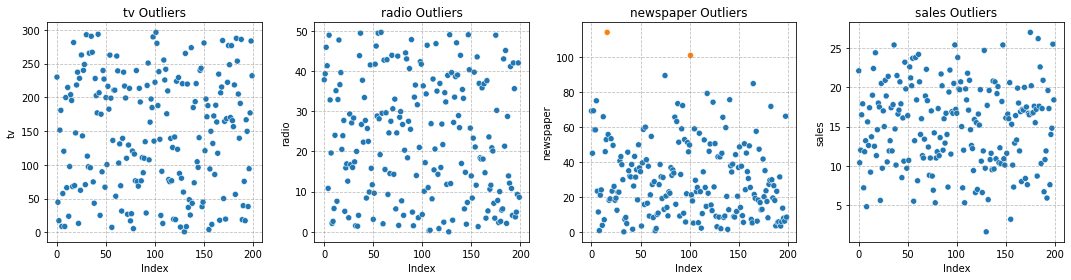

,tv,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [47]:
#identify outliers
plt.figure(figsize=(15, 4))
#loop through each column to create a subplot for each variable
for i, col in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    sns.scatterplot(data=df, x=range(len(df)), y=col, hue=outliers[col])
    plt.title(f'{col} Outliers')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend([],[], frameon=False)
    plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.show()

outliers_rows = df[outliers.any(axis=1)]
outliers_rows

In the scatter plots for TV, Radio, Newspaper, and Sales, the normal data points are shown in blue, while the outliers are overlaid in red for each variable.

Outliers are identified in the Newspaper advertising budget where there are two data points that stand out from the rest. These are the points with the highest budgets for newspaper advertising, which are unusually high compared to the typical data points.

Index 16 with a Newspaper budget of 114.0 units.

Index 101 with a TV budget of 296.4 units and a Newspaper budget of 100.9 units.

In [50]:
#removing outliers from the dataset based on Z-scores
df_clean = df[~(np.abs(z_scores) > threshold).any(axis=1)]

#shape of the data before and after outlier removal
original_shape = df.shape
cleaned_shape = df_clean.shape

original_shape, cleaned_shape

((200, 4), (198, 4))

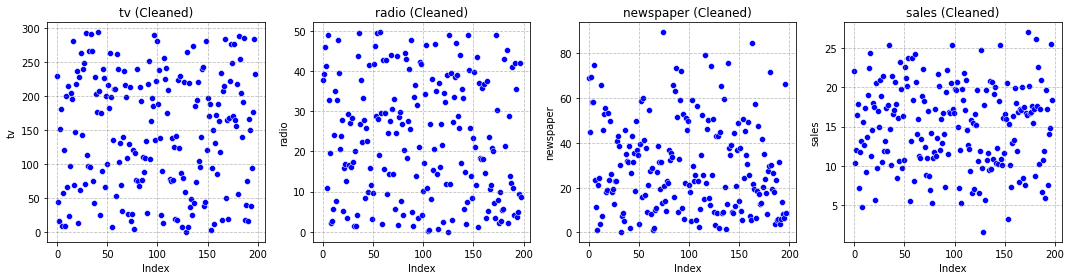

In [51]:
plt.figure(figsize=(15, 4))
#loop through each column to create a subplot 
for i, col in enumerate(df_clean.columns):
    plt.subplot(1, 4, i+1)
    sns.scatterplot(x=range(len(df_clean)), y=df_clean[col], color='blue')
    plt.title(f'{col} (Cleaned)')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.show()

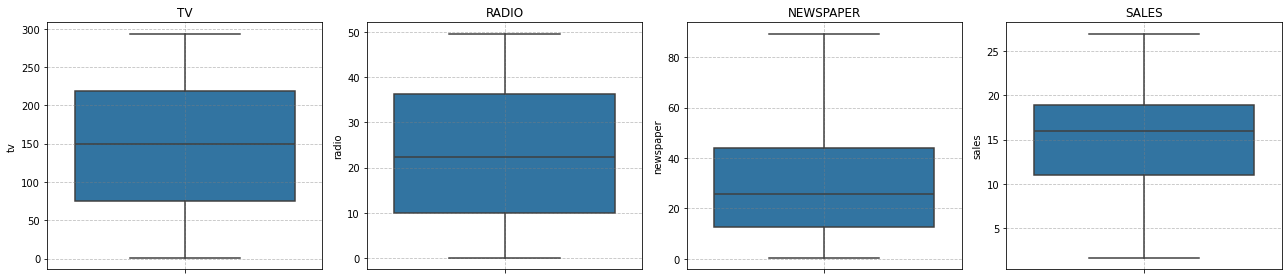

In [52]:
#box plots for each variable
plt.figure(figsize=(18, 4))
for i, col in enumerate(['tv', 'radio', 'newspaper', 'sales']):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'{col.upper()}')
    plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.tight_layout()
plt.show()

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         198 non-null    float64
 1   radio      198 non-null    float64
 2   newspaper  198 non-null    float64
 3   sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


### 6. Feature Engineering 

In [55]:
df_clean[:10]

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [56]:
X = df_clean[['tv']].values
y = df_clean['sales']

- Dependent Variable (Y): This should be the variable we are trying to predict. In our case, it's Sales. The sales data represents the outcome or the target variable that we want to forecast using the predictors.

- Independent Variables (X): These are the variables we will use to predict sales. In your dataset, you have advertising budgets for TV, Radio, and Newspaper, along with the interaction term between TV and Radio. we can choose to include all or some of these as our predictors.

In [58]:
X[:5]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8]])

In [59]:
y[:5]

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: sales, dtype: float64

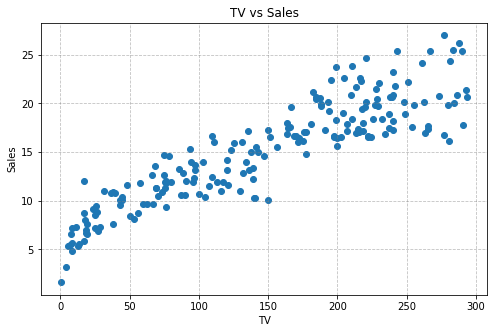

In [60]:
plt.figure(figsize=(8, 5))
plt.scatter(X,y)
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.title('TV vs Sales')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.show()

In [61]:
print(f'Dimesional of Independent Variable: {X.ndim}D')
print(f'Dimesional of Dependent Variable: {y.ndim}D')

Dimesional of Independent Variable: 2D
Dimesional of Dependent Variable: 1D


- Dimensionality of Independent Variable (Features):
2D refers to a two-dimensional independent variable. In most machine learning scenarios, this means that you have multiple features (columns) as input variables. Each feature represents a different aspect or attribute of your data. The data is organised in a tabular format where each row corresponds to an observation or data point, and each column corresponds to a feature.

- Dimensionality of Dependent Variable (Target):
1D refers to a one-dimensional dependent variable. This typically means that you have a single target variable or outcome variable that you are trying to predict or analyse. The target variable is often represented as a one-dimensional array or vector.

### Standard Scaler

In [64]:
X = (X - X.mean())/X.std()

- A standardised scale on the x-axis, also known as a standardised or normalised variable, is often used in data visualisation and statistical analysis.

- Comparability: Standardising the x-axis allows for straightforward comparisons between data points or groups.

- Interpretability: It makes data more understandable by removing the influence of different units of measurement.

- Bias Reduction: Standardisation helps eliminate biases and distortions in data representation.

- Statistical Analysis: Many statistical methods assume standardised scales, ensuring correct results.

- Data Transformation: Standardization is a common technique to meet the assumptions of statistical tests.

- Normalization: It often involves transforming data to have a mean of zero and standard deviation of one, aiding pattern recognition.

- Clarity: Graphs with standardised scales are visually clearer and more readable.

- Comparing Datasets: It simplifies the comparison of data from different sources.

In [66]:
X[:5]

array([[ 0.97869734],
       [-1.19901165],
       [-1.51933199],
       [ 0.05645636],
       [ 0.40024339]])

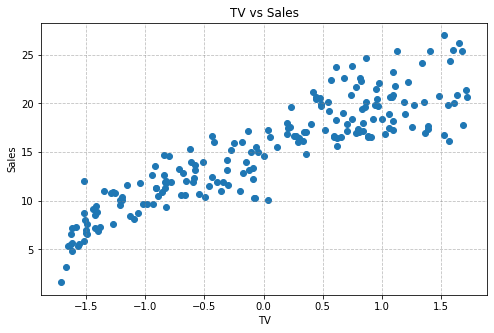

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(X,y)
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.title('TV vs Sales')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.show()

### Splitting Data into Train and Test Set

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [71]:
#shape of train
X_train.shape, y_train.shape

((158, 1), (158,))

In [72]:
#shape of test
X_test.shape, y_test.shape

((40, 1), (40,))

### Model Selection 

Model selection is a most important step in machine learning and statistical modeling. It involves choosing the appropriate algorithm or model to use for a specific task or problem. we are working with a Linear Regression model, which is one type of model selection. We are training the model on a training dataset, where we can make predictions on a test dataset, and examine the predicted values.

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
linear_model = LinearRegression()

In [77]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = linear_model.predict(X_test)

In [79]:
y_pred

array([15.01845297,  9.73475346, 14.13874144, 16.26199582,  8.47491966,
       13.03095655,  7.49203209, 14.69263389,  8.31201012, 17.74990298,
       21.20901561,  8.51293189, 19.75369036, 17.06025258, 11.0977633 ,
       13.54683677, 12.21640883,  8.40975584,  9.36006151, 18.7164996 ,
       20.14467326, 14.63833071, 11.89058975, 14.17132335, 11.0054479 ,
       18.40154115, 16.01220119, 18.15174652, 20.64426253, 16.52808141,
       22.30050955, 21.88237505,  9.35463119, 22.75122595, 19.41701063,
       12.13495406, 18.98258519, 16.83760954, 14.58402753, 11.75483179])

In [80]:
y_pred_train = linear_model.predict(X_train)

In [81]:
y_pred_train

array([18.9554336 , 22.05614523, 20.05778817, 20.01434563, 20.22612803,
       18.61332356,  7.48660177, 12.69970714,  7.93731817,  8.0350639 ,
       14.36138448,  7.41600763, 20.05778817, 13.38392723, 21.2959007 ,
       13.15042355, 11.26610317, 16.63125745, 14.41568766, 18.88483946,
       17.53812057, 20.04149722, 18.87940914, 11.67337702,  8.57266539,
       17.82049711, 15.89816451, 18.77080278,  7.47574113, 17.06025258,
       10.07143318, 14.31251162, 11.37470953, 15.52347256, 20.80174175,
       20.88862684, 18.10287365, 20.53022585, 19.48217445, 16.63125745,
       20.04692753,  9.09397593,  7.73096608, 12.5965311 ,  7.95360912,
        9.92481459, 16.38689313, 19.62336272,  8.38260425, 10.60903468,
       17.22316212, 18.60789324,  7.95360912, 22.0452846 ,  9.08311529,
        7.44315922, 12.85175605, 16.56066331,  7.65494163, 11.11948458,
       12.47163378, 19.51475636, 15.88730387, 19.28125268, 17.74990298,
       10.7665139 , 17.3969323 , 22.96300835, 17.83135775, 17.86

In [82]:
print(f'Coefficient of Model: {linear_model.coef_[0]:.4f}')

Coefficient of Model: 4.6281


In [83]:
print(f'Intercept of Model: {linear_model.intercept_:.4f}')

Intercept of Model: 14.9852


### Predictive Analysis (Best Fit Line)

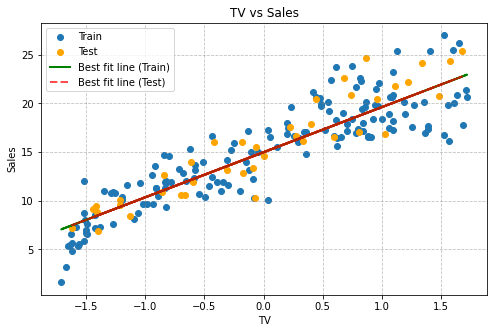

In [85]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train,y_train, label='Train')
plt.scatter(X_test,y_test, color='orange', label='Test')
plt.plot(X_train, y_pred_train, color='green', lw=2, label='Best fit line (Train)')
plt.plot(X_test, y_pred, color='red', alpha=0.7, ls='--', lw=2, label='Best fit line (Test)')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.title('TV vs Sales')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend()
plt.show()

### R Squared

R-squared, often denoted as R², is a statistical measure that provides information about the goodness of fit of a regression model. It is a crucial metric used to assess how well a regression model explains the variability in the dependent variable. R-squared is a value between 0 and 1, and it quantifies the proportion of the variance in the dependent variable that can be explained by the independent variables in the model.

Higher R-squared values indicate that a larger proportion of the variance in the dependent variable is explained by the model. A higher R-squared is generally preferred because it suggests that the model captures more of the underlying patterns in the data.

In [89]:
from sklearn.metrics import r2_score

In [90]:
print("R Squared Train Set: ", round(r2_score(y_train, y_pred_train), 4))
print("R Squared Test Set: ", round(r2_score(y_test, y_pred), 4))

R Squared Train Set:  0.798
R Squared Test Set:  0.8512


- R-squared on Training Set (0.798): This value indicates how well our model explains the variability of the dependent variable based on the independent variables in the training dataset. An R-squared of 0.798 means that approximately 79.8% of the variance in your dependent variable is predictable from the independent variables in the training set. This is a relatively high value, suggesting a good fit of the model to the training data.

- R-squared on Test Set (0.8512): This value measures the same thing as the R-squared for the training set, but it's calculated using the test dataset – a separate set of data not used in training the model. An R-squared of 0.8512 on the test set, which is higher than the training set, suggests that your model not only fits the training data well but also generalises effectively to new, unseen data. This is a good sign of the model's predictive power.

### Mean Squared Error 

Mean Squared Error (MSE) is a common and widely used metric in statistics and machine learning to evaluate the performance of a regression model. MSE quantifies the average squared difference between the predicted values generated by a model and the actual observed values. It measures the quality of the model's predictions by assessing how close the predictions are to the true values. 

- The primary purpose of MSE is to measure the overall accuracy and goodness of fit of a regression model.

- It provides a single, interpretable metric that quantifies the average error between predictions and actual values.

- Lower MSE values indicate better model performance. A smaller MSE means that the model's predictions are closer to the actual values on average.

- MSE is not in the same units as the original data. Instead, it is in squared units of the dependent variable.

- A low MSE suggests that the model's predictions are close to the actual values, while a high MSE indicates that the model's predictions deviate from the actual values, on average.

- MSE is sensitive to outliers because it squares the differences between actual and predicted values. Outliers with large deviations can disproportionately affect the MSE.

- Squaring the differences can amplify the impact of large errors, making it sensitive to outliers.

- MSE does not provide a direct intuitive sense of the scale of error; it is in squared units of the dependent variable.

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
print("Mean Square Error Train set: ", round(mean_squared_error(y_train, y_pred_train),4))
print("Mean Square Error Test Set: ", round(mean_squared_error(y_test, y_pred),4))

Mean Square Error Train set:  5.5658
Mean Square Error Test Set:  4.14


#### Root Mean Square Error

Root Mean Square (RMS), also known as the Root Mean Square Error (RMSE) when used as an error metric, is a mathematical concept used to quantify the average magnitude of a set of values or the average error between predicted and actual values.

- The primary purpose of RMSE is to quantify the average error or discrepancy between predicted values and actual observed values.

- RMSE is in the same units as the dependent variable (the quantity being measured). It provides a measure of how well the predicted values align with the actual values on average.

- Lower RMSE values indicate better model performance. A smaller RMSE means that the model's predictions are, on average, closer to the actual values.

- Taking the square root of the mean squared differences helps make the RMSE metric more interpretable because it brings the units of measurement back to the original scale.

- Similar to MSE (Mean Squared Error), RMSE is sensitive to outliers because it squares the differences between actual and predicted values. Outliers with large deviations can disproportionately affect the RMSE.

- Like MSE, RMSE can be sensitive to outliers, which may not always reflect the overall performance of the model.

- It doesn't provide information about the direction of errors (overpredictions or underpredictions) or the impact of specific data points on the RMSE.

In [100]:
print("Root Mean Square Error Train Set: ", round(np.sqrt(mean_squared_error(y_train, y_pred_train)),4))
print("Root Mean Square Error Test Set: ", round(np.sqrt(mean_squared_error(y_test, y_pred)),4))

Root Mean Square Error Train Set:  2.3592
Root Mean Square Error Test Set:  2.0347


### Gradient Descent 

Gradient Descent is an optimisation algorithm that's used for finding the values of parameters (coefficients) of a function (f) that minimises a cost function (cost). It's commonly used in machine learning and deep learning for training models.


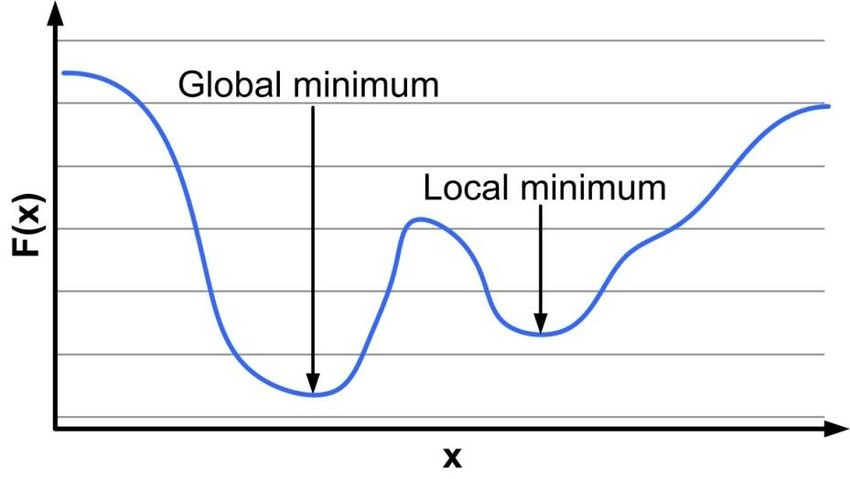

- Starting Point: You're dropped somewhere in the valley and your goal is to find the lowest point. You don't know where that is yet, so you could start anywhere.

- Feeling the Slope: You feel the ground to determine which way is downhill. If the slope goes down to your left, that means you should probably move left.

- Taking a Step: You take a small step in the direction that felt like it was going downhill. How big a step you take is important: too big, and you might overshoot and miss the bottom; too small, and it'll take you a long time to get there.

- Repeating the Steps: After each step, you feel for the slope again and take another step in the downhill direction.
Approaching the Lowest Point: As you continue, each step brings you closer to the lowest point. Eventually, your steps are so small that you decide you're close enough to the bottom.

In [105]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    #X and y are being flattened 
    X = X.ravel()
    y = y.ravel()
    
    #initial parameters with zero
    m, b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
    
    #storing mse history
    mse_history = []  
    
    #for loop to iterate over range of iterations
    for _ in range(iterations):
        #predictions
        y_pred = m * X + b 
        #calculating mean square error
        mse = mean_squared_error(y, y_pred)
        #appending history of mean sqaure error
        mse_history.append(mse)

        #gradient computation should not produce a series but a single number
        #X should be 1Dimensional
        grad_m = -(2/len(y)) * np.sum((y - y_pred) * X) 
        grad_b = -(2/len(y)) * np.sum(y - y_pred)
        #updating m and b
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b

    return m, b, mse_history

- Start with Initial Parameters: initialise the parameters of the model at random or with zeros. In your case, m (the slope) and b (the intercept) of the linear equation y = mx + b start at 0.

- Calculate the Prediction: Using the current values of the parameters, you compute the predicted output (y_pred). In linear regression, this would be the line y = mx + b for all the input X.

- Compute the Cost: Evaluate how well your model is performing by computing the cost (or loss). The cost function is a measure of how far off the predictions are from the actual outcomes. Mean Squared Error (MSE) is a common cost function used in regression, which averages the squares of the errors between predicted and actual values.

- Compute the Gradients: The gradient is the vector of partial derivatives of the cost function with respect to each parameter. In simple terms, it points in the direction of the steepest ascent of the cost function. Since you want to minimise the cost, you calculate the negative of the gradient to know in which direction you should adjust the parameters.

- Update the Parameters: Adjust the parameters by a small step (learning_rate) in the direction that reduces the cost the most (opposite to the gradient). The learning rate determines how big a step you take. If it's too large, you might overshoot the minimum; if it's too small, the optimisation will be slow.

- Repeat the Process: Repeat steps 2-5 for a fixed number of iterations or until the changes in the cost function are below a small threshold.

In [107]:
m_train, b_train, mse_history_train = gradient_descent(X_train, y_train, learning_rate=0.001, iterations=10000)
m_test, b_test, mse_history_test = gradient_descent(X_test, y_test, learning_rate=0.001, iterations=10000)

- Mean Square Error (MSE): MSE is a measure of the average squared difference between the actual values (ground truth) and the predicted values generated by a model or algorithm. In the context of regression problems, where you're trying to fit a model to data, MSE quantifies how well your model is performing. A lower MSE indicates a better fit, meaning your model's predictions are closer to the actual values.

- Iterations: In the context of optimisation algorithms like gradient descent, iterations refer to the number of times the algorithm updates the model parameters to minimise the error (MSE in this case). Each iteration involves calculating the gradients, adjusting the model parameters, and re-evaluating the MSE. 


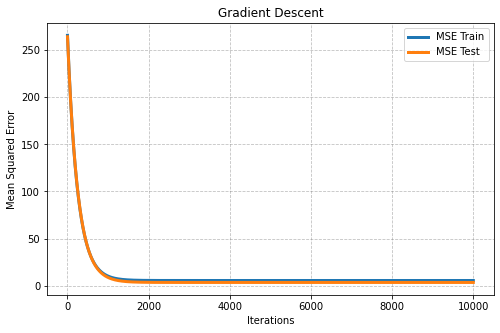

In [109]:
plt.figure(figsize=(8, 5))
plt.plot(mse_history_train, label='MSE Train', lw=3)
plt.plot(mse_history_test, label='MSE Test', lw=3)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent')
plt.legend()
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

- Initial State: At the beginning (iteration 0), your model parameters (like coefficients in linear regression) are typically set to some initial values (often zeros or random values). The initial MSE will likely be relatively high, indicating that your model is far from optimal.

- Decreasing MSE: As the optimisation algorithm (e.g., gradient descent) progresses through iterations, it aims to minimize the MSE. With each iteration, the algorithm updates the model parameters to reduce the error. This results in a gradual decrease in the MSE.

- Convergence: Ideally, the MSE decreases with each iteration and eventually reaches a point where it stops decreasing significantly. This point is known as convergence, indicating that the optimisation process has found a set of model parameters that result in a reasonably good fit to the data.

- Monitoring Progress: The plot of MSE against iterations is often used to monitor the training progress of machine learning models. It can help you determine if the model is converging to a good solution or if it's getting stuck or diverging (MSE increases).

- Early Stopping: In practice, you might also implement early stopping based on the MSE vs. iterations plot. If you notice that the MSE starts to increase after a certain number of iterations (indicating overfitting), you can stop training to prevent your model from becoming too complex. 

In [111]:
print(f"Model Parameters Train: m = {m_train}, b = {b_train}")
print(f"Mean Squared Error Train: {mse_history_train[-1]}")

Model Parameters Train: m = 4.6281070833650775, b = 14.98524024006235
Mean Squared Error Train: 5.56583149133553


In [112]:
print(f"Model Parameters Test: m = {m_test}, b = {b_test}")
print(f"Mean Squared Error Test: {mse_history_test[-1]}")

Model Parameters Test: m = 5.213020989673789, b = 15.56288083368796
Mean Squared Error Test: 3.5112207634308725


In [113]:
y_pred_test = np.dot(X_test, m_test) + b_test
y_pred_test[:5]

array([[15.60029106],
       [ 9.64882193],
       [14.60939897],
       [17.00099654],
       [ 8.2297666 ]])

In [114]:
y_pred_train = np.dot(X_train, m_train) + b_train
y_pred_test[:5]

array([[15.60029106],
       [ 9.64882193],
       [14.60939897],
       [17.00099654],
       [ 8.2297666 ]])

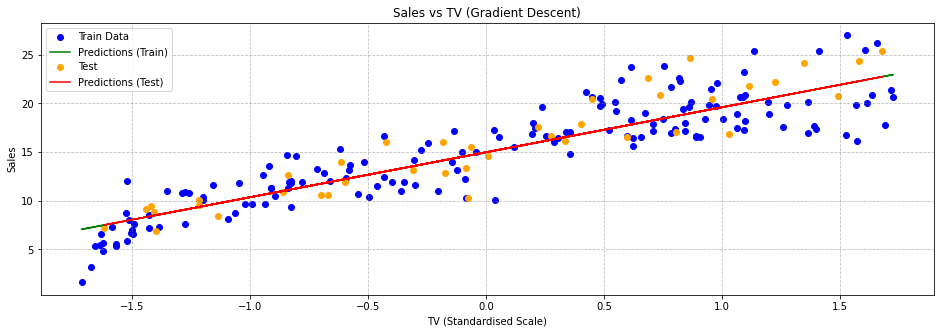

In [115]:
plt.figure(figsize=(16, 5))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, y_pred_train, color='green', label='Predictions (Train)')
plt.scatter(X_test, y_test, color='orange', label='Test')
plt.plot(X_test, y_pred, color='red', label='Predictions (Test)')
plt.title('Sales vs TV (Gradient Descent)')
plt.xlabel('TV (Standardised Scale)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

- The regression lines for both training and test sets appear to be almost overlapping, suggesting that the model generalises well from the training data to unseen test data.

- The distribution of the data points suggests a positive linear relationship between TV advertising budget and sales, which the regression line is capturing.

- The spread of the data points around the regression lines suggests some variability that isn't captured by the model, which is to be expected in most real-world data.

- The fact that the training and test predictions are close suggests that there's no overfitting. Overfitting would be indicated if the model performed significantly better on the training data compared to the test data.

- There are a few outliers or points with high residual values (particularly in the test set) that deviate from the model predictions. These could be due to external factors not included in the model or random variations.

- The model seems to predict lower values of sales (left side of the plot) more accurately than higher values of sales (right side of the plot), where the predictions tend to be more spread out. This could indicate heteroscedasticity or that the model is less accurate at predicting higher values of sales.

### Mean Square Error

In [118]:
print("Mean Square Error Train set: ", round(mean_squared_error(y_train, y_pred_train),4))
print("Mean Square Error Test Set: ", round(mean_squared_error(y_test, y_pred_test),4))

Mean Square Error Train set:  5.5658
Mean Square Error Test Set:  3.5112


### Root Mean Square Error

In [120]:
print("Root Mean Square Error Train Set: ", round(np.sqrt(mean_squared_error(y_train, y_pred_train)),4))
print("Root Mean Square Error Test Set: ", round(np.sqrt(mean_squared_error(y_test, y_pred_test)),4))

Root Mean Square Error Train Set:  2.3592
Root Mean Square Error Test Set:  1.8738


- RMSE Training Set (2.3592): Indicates the average error in the model's predictions for the data it was trained on. Lower values imply better fit.

- RMSE Test Set (1.8738): Represents the average error for new, unseen data. Unusually, this is lower than the training set's RMSE, suggesting either excellent model generalisation or that the test data might be inherently easier to predict.

- MSE Training Set (5.5658): Reflects the average of the squared differences between predicted and actual values in the training data. Higher values indicate poorer fit.

- MSE Test Set (3.5112): Measures the same for the test data. Here, the lower MSE compared to the training set could signal better model performance on unseen data or a simpler test dataset.

### R Sqaured

In [123]:
print("R Squared Train Set: ", round(r2_score(y_train, y_pred_train), 4))
print("R Squared Test Set: ", round(r2_score(y_test, y_pred_test), 4))

R Squared Train Set:  0.798
R Squared Test Set:  0.8738


### Homoscedasticity (Residuals plot)

In [125]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
y_pred_test = y_pred_test.flatten()
residuals_test = y_test - y_pred_test

y_pred_train = y_pred_train.flatten()
residuals_train = y_train - y_pred_train

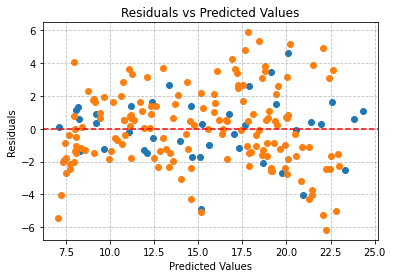

In [127]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_test, residuals_test, label='Test data points')
plt.scatter(y_pred_train, residuals_train, label='Train data points')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

- Horizontal Distribution: Ideally, the residuals should be randomly dispersed around the horizontal axis (which is the line where the residual value is zero). If the residuals are randomly distributed, it suggests that the model is well-fitted to the data. In your plot, the residuals do seem to be fairly randomly spread out, indicating a good fit.

- No Clear Patterns: If there were any clear patterns, such as a curve or clustered groupings, this would suggest that the model may be missing some explanatory information that is influencing the response variable. The plot you have does not seem to show any obvious patterns, which is a positive sign that your model is capturing most of the variability in the data.

- Homoscedasticity: A key assumption in linear regression is that the residuals have constant variance at all levels of the independent variable(s). This property is called homoscedasticity. If the spread of residuals is equal across all levels of the predicted values, the assumption holds true. In your plot, the spread of residuals appears consistent across the range of predicted values, suggesting that homoscedasticity is present.

- Outliers: There are a few points that stand out from the rest, particularly one point below the -4 line on the residuals axis, which could be considered an outlier. Outliers can have a large influence on the regression model and can sometimes indicate a data error or other anomalies.

- Centering Around Zero: It's also important that the residuals are centered around zero, which they appear to be in this plot. This indicates that the model is not systematically over- or under-predicting.
Range of Residuals: The residuals range from about -6 to +6. Whether this is acceptable depends on the context of your data and the specific domain. In some applications, residuals of this magnitude might be perfectly acceptable, while in others, they could be too large.

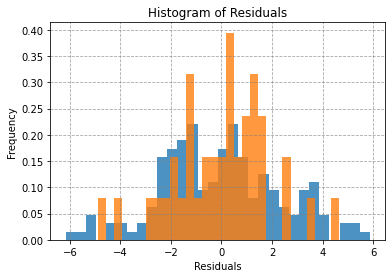

In [129]:
#histogram of residuals
plt.figure(figsize=(6, 4))
plt.hist(residuals_train, bins=30, density=True, alpha=0.8)
plt.hist(residuals_test,bins=30, density=True, alpha=0.8)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, ls='--', alpha=0.7, color='grey')
plt.show()

- Centrality: Both sets of residuals seem to be centered around zero, which suggests that the model does not have a systematic bias in over predicting or under predicting.

- Spread: The spread of residuals looks similar for both training and test sets, which indicates that the model has a consistent performance on both datasets.

- Outliers: There are residuals at the extremes of the scale (close to -6 and 6), which could be outliers or indicate that the model performs less well at these points.

- Normality: The shape of the histograms, especially for the training set, suggests a roughly normal distribution of residuals, which is an assumption in many regression models. However, there is a noticeable tail on the right side, indicating some skewness.

- Overlap: There is significant overlap between the training and test residuals, which implies that the model is performing in a similar manner on both sets. However, the test set shows slightly more spread, suggesting slightly more variability in the model's performance on unseen data.

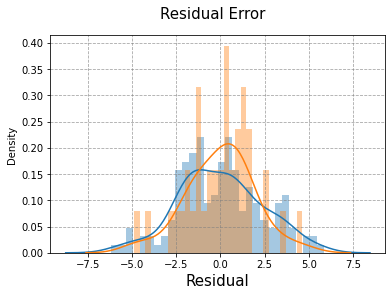

In [131]:
fig = plt.figure()
sns.distplot(residuals_train, bins = 30)
sns.distplot(residuals_test, bins = 30)
fig.suptitle('Residual Error', fontsize = 15)                  
plt.xlabel('Residual', fontsize = 15)       
plt.grid(True, ls='--', alpha=0.7, color='grey')
plt.show()

 - Distribution Shape: The plot suggests that both training and test residuals have a roughly normal distribution, centered around zero. This is a good indication that the model is unbiased and predicts values that are on average correct.

- Consistency Between Sets: The similarity in the shapes of the distributions for both training and test sets suggests that the model has consistent performance on both sets. There is no significant overfitting or underfitting since the distributions are quite similar.

- Potential Outliers: The tails of the distributions, especially beyond the -2.5 and 2.5 marks, suggest the presence of some residuals that are quite far from zero. These could be outliers or instances where the model's predictions were significantly different from the actual values.

- Width of the Distributions: The spread or width of the distributions provides insight into the variance of the residuals. A narrower peak would suggest more precise predictions.

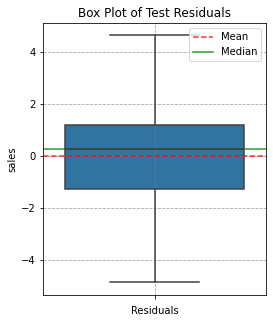

In [133]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=residuals_test)
mean = np.mean(residuals_test)
median = np.median(residuals_test)
plt.axhline(mean, color='r', linestyle='--', label='Mean', alpha=0.8)
plt.axhline(median, color='g', linestyle='-', label='Median', alpha=0.8)
plt.title('Box Plot of Test Residuals')
plt.xlabel('Residuals')
plt.grid(True, ls='--', alpha=0.7, color='grey')
plt.legend()
plt.show()

- Central Tendency: The red dashed line represents the mean of the residuals, and the green solid line represents the median. The fact that these two lines are close together suggests that the test residuals are symmetrically distributed around the center.

- Interquartile Range (IQR): The edges of the blue box represent the first and third quartiles of the residuals. The IQR contains the middle 50% of the data. A smaller IQR indicates less variability in the middle half of the data.

- Whiskers: The "whiskers" extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles, respectively. Points outside this range are often considered outliers.

- Potential Outliers: There don't appear to be individual points plotted beyond the whiskers, which would indicate outliers. This suggests that there are no extreme values in the test residuals that are far from the rest of the data.

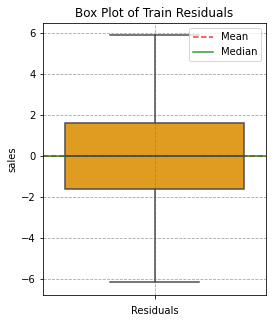

In [135]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=residuals_train, color='orange')
mean = np.mean(residuals_train)
median = np.median(residuals_train)
plt.axhline(mean, color='r', linestyle='--', label='Mean', alpha=0.8)
plt.axhline(median, color='g', linestyle='-', label='Median', alpha=0.8)
plt.title('Box Plot of Train Residuals')
plt.xlabel('Residuals')
plt.grid(True, ls='--', alpha=0.7, color='grey')
plt.legend()
plt.show()

- Central Tendency: As with the test residuals, the mean and median are indicated by the red dashed and green solid lines, respectively. In this plot, the lines are not as close together as in the test residuals plot, indicating a slight skew in the distribution of the training residuals.

- Interquartile Range (IQR): The edges of the orange box indicate the first and third quartiles. The IQR seems to be larger for the training data than for the test data, suggesting greater variability.

- Whiskers: The whiskers of the training data extend further than those of the test data, especially on the lower end, indicating a wider range of residuals within the main bulk of the data.

- Potential Outliers: Similar to the test residuals, there do not appear to be any individual points plotted as outliers.

#### Comparative Observations

- Variability: The training residuals have a wider IQR and whiskers, which suggests that the residuals for the training set are more spread out than for the test set. This could mean the model fits the training data with more variability in the errors.

- Skewness: The training residuals seem slightly skewed since the mean and median are not aligned, whereas the test residuals appear more symmetric.

- Model Performance: The absence of outliers in both box plots is a positive sign, indicating that the model does not produce many extreme errors on either the training or test sets.

### Breusch-Pagan

In [139]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [140]:
def Breusch_Pagan(X_train, y_train, X_test, y_test):
    X_train_ols = sm.add_constant(X_train)
    stat_model_train = sm.OLS(y_train, X_train_ols)
    results_train = stat_model_train.fit()
    residuals_train = results_train.resid
    bp_test_train = het_breuschpagan(residuals_train, X_train_ols)
    bp_statistic_train, bp_p_value_train = bp_test_train[:2]
    print(f"Breusch-Pagan Train Statistic: {bp_statistic_train}, P-Value: {bp_p_value_train}")
    
    X_test_ols = sm.add_constant(X_test)
    stat_model_test = sm.OLS(y_test, X_test_ols)
    results_test = stat_model_test.fit()
    residuals_test = results_test.resid
    bp_test_test = het_breuschpagan(residuals_test, X_test_ols)
    bp_statistic_test, bp_p_value_test = bp_test_test[:2]
    print(f"Breusch-Pagan Test Statistic: {bp_statistic_test}, P-Value: {bp_p_value_test}")

In [141]:
Breusch_Pagan(X_train, y_train, X_test, y_test)

Breusch-Pagan Train Statistic: 10.683143796781229, P-Value: 0.0010811616480797682
Breusch-Pagan Test Statistic: 2.55874782337679, P-Value: 0.10968542899923137


#### Breusch-Pagan Train Statistic: 10.68, P-Value: 0.001081:

The low p-value associated with the Breusch-Pagan Train Statistic suggests evidence against the null hypothesis. This indicates that there is a significant relationship or evidence of heteroscedasticity in the train dataset. In other words, the variances of the residuals are not constant across different levels of the independent variables.
#### Breusch-Pagan Test Statistic: 2.55, P-Value: 0.1096:

The higher p-value ) associated with the Breusch-Pagan Test Statistic suggests weaker evidence against the null hypothesis. This implies that there is less evidence of heteroscedasticity in the test dataset compared to the train dataset.

In [143]:
def White_Test(X_train, y_train, X_test, y_test):
    X_train_ols = sm.add_constant(X_train)
    stat_model_train = sm.OLS(y_train, X_train_ols)
    results_train = stat_model_train.fit()
    residuals_train = results_train.resid
    white_test_train = het_white(residuals_train, X_train_ols)
    white_statistic_train, white_p_value_train = white_test_train[:2]
    print(f"White Test Train Statistic: {white_statistic_train}, P-Value: {white_p_value_train}")
    
    X_test_ols = sm.add_constant(X_test)
    stat_model_test = sm.OLS(y_test, X_test_ols)
    results_test = stat_model_test.fit()
    residuals_test = results_test.resid
    white_test_test = het_white(residuals_test, X_test_ols)
    white_statistic_test, white_p_value_test = white_test_test[:2]
    print(f"White Test Test Statistic: {white_statistic_test}, P-Value: {white_p_value_test}")


In [144]:
White_Test(X_train, y_train, X_test, y_test)

White Test Train Statistic: 18.60282193309993, P-Value: 9.129532590781113e-05
White Test Test Statistic: 3.826391919242673, P-Value: 0.14760788311240322


- White Test Train Statistic: 18.60282 with a P-Value: 0.0000913: The White test statistic for the training data is high, and the p-value is very small, well below 0.05. This indicates a strong presence of heteroscedasticity in the training data residuals.

- White Test Test Statistic: 3.82639 with a P-Value: 0.14760: The White test statistic for the test data is lower, and the p-value is above 0.05. This suggests that heteroscedasticity is not detected in the test data residuals.

### Normality Test

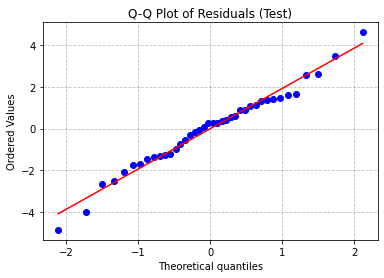

In [147]:
#Normality (Q-Q plot)
plt.figure(figsize=(6, 4))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Test)')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

- Theoretical Quantiles: These are plotted on the x-axis. They represent the expected values from the normal distribution.

- Ordered Values: The y-axis shows the actual residuals from the model ordered from smallest to largest.

- Observations:The points generally follow the red line, which represents the expected trend if the residuals were normally distributed.Most points lie on the line, suggesting that the residuals are approximately 
normally distributed.There are some deviations at the ends, especially the upper right corner, indicating heavier tails than a normal distribution. This could suggest the presence of outliers or extreme values in the test data.

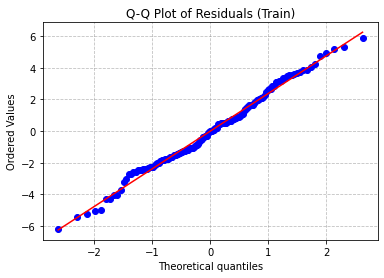

In [149]:
#Normality (Q-Q plot)
plt.figure(figsize=(6, 4))
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Train)')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

- Theoretical Quantiles: As with the test plot, these are the expected values from the normal distribution.

- Ordered Values: The actual residuals from the training data.

- Observations:The residuals mostly follow the line, indicating that they are approximately normally distributed.Similar to the test plot, there is a deviation at the upper end of the distribution, suggesting that the training data also has some extreme values or outliers.

### Independence : Durbin-Watson statistic

If the Durbin-Watson Statistic is close to 2 (typically between 1.5 and 2.5), it suggests that there is no significant autocorrelation in the residuals, indicating that the observations are relatively independent.

Values significantly below 2 (e.g., below 1.5) may indicate positive autocorrelation (residuals are positively correlated), which implies that there is some underlying pattern or dependence in the data that the model has not captured.

Values significantly above 2 (e.g., above 2.5) may indicate negative autocorrelation (residuals are negatively correlated), which also suggests a lack of independence in the data.

In [153]:
#independence : Durbin-Watson statistic
durbin_watson_stat_test = sm.stats.stattools.durbin_watson(residuals_test)
durbin_watson_stat_train = sm.stats.stattools.durbin_watson(residuals_train)

In [154]:
#function to print the Durbin-Watson statistic
def durbin_watson(durbin_watson_statistic):
    print(f'Durbin-Watson Statistic = {durbin_watson_statistic:.4f}')

In [155]:
durbin_watson(durbin_watson_stat_test)

Durbin-Watson Statistic = 1.8603


In [156]:
durbin_watson(durbin_watson_stat_train)

Durbin-Watson Statistic = 1.9860


##### Durbin-Watson Statistic suggests that there might be slightly positive autocorrelation in the residuals.

### Multicollinearity : Variance Inflation Factor (VIF)

In the context of a simple linear regression model, where there is only one independent variable, multicollinearity is not a concern. Multicollinearity refers to the situation where two or more independent variables in a multiple regression model are highly correlated with each other. This correlation can make it difficult to determine the individual effect of each independent variable on the dependent variable.

While working with a simple linear regression model, which involves just one independent variable, there is no possibility of correlation with another independent variable, simply because there is no other independent variable. Therefore, the concept of multicollinearity does not apply in this case.

So, in your case, where you're using SALES as the single independent variable to predict 'TV' (or vice versa), we do not need to worry about multicollinearity. 

### Spearman's Rank Correlation Coefficient

Spearman's correlation is a non-parametric measure of rank correlation that assesses how well the relationship between two variables can be described using a monotonic function. It's particularly useful when the data do not meet the assumptions of Pearson's correlation coefficient (such as normally distributed variables or a linear relationship).

In [162]:
rho, p_value = stats.spearmanr(X_train, y_train)

print(f"Spearman's Rank Correlation Coefficient (ρ): {rho:.4f}")

Spearman's Rank Correlation Coefficient (ρ): 0.8857


In [163]:
rho, p_value = stats.spearmanr(X_test, y_test)

print(f"Spearman's Rank Correlation Coefficient (ρ): {rho:.4f}")

Spearman's Rank Correlation Coefficient (ρ): 0.9417


### Cook's distances

Cook's distance is a measure used in regression analysis to identify influential data points or observations that have a large impact on the fitted regression model. It helps in detecting outliers and influential points that may disproportionately affect the model's parameters and predictions.

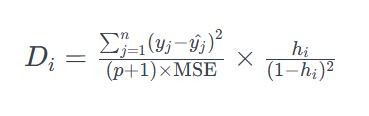

$D_i$ is the Cook's distance for the ith observation.

$n$ is the total number of observations.

$p$ is the number of predictors in the model (excluding the intercept).

$y_j$ is the actual observed value for the jth observation.

$ŷ_j$ is the predicted value for the jth observation obtained from the regression model, excluding the ith observation.

$MSE$ is the mean squared error of the model fitted to all data points.

$h_i$ is the leverage of the ith observation, which is a measure of how much the ith observation influences its own prediction. It is computed as 

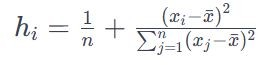

where $x_i$ is the predictor values for the i-th observation, and $x̄$ is the mean of the predictor values for all observations.

In [170]:
#mean squared error
def mean_square_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

#Cook's Distance
cooks_distances = []

#model parameters
m, b, _ = gradient_descent(X_train.ravel(), y_train.ravel(), 0.001, 2000)
y_pred = m * X_train.ravel() + b
mse = mean_square_error(y_train, y_pred)

for i in range(len(X_train)):
    #exclude the current observation
    X_train_temp = np.delete(X_train.ravel(), i)
    y_train_temp = np.delete(y_train.ravel(), i)

    #train model without the ith observation
    m_temp, b_temp, _ = gradient_descent(X_train_temp, y_train_temp, 0.001, 2000)
    y_pred_temp = m_temp * X_train.ravel() + b_temp

    #change in predictions and mean square error
    mse_temp = mean_square_error(y_train, y_pred_temp)
    cooks_di = ((mse_temp - mse) ** 2) / (2 * mse)
    cooks_distances.append(cooks_di)

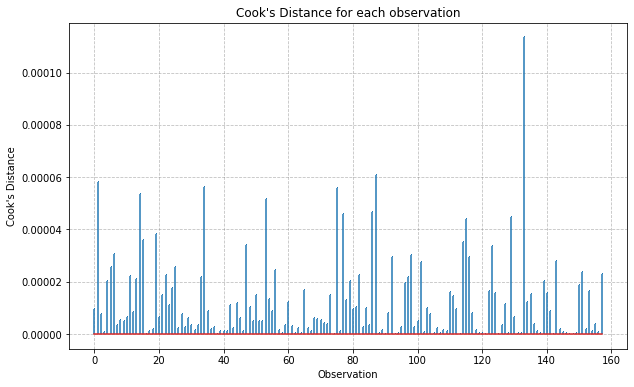

In [171]:
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distances)), cooks_distances, markerfmt=",")
plt.title("Cook's Distance for each observation")
plt.xlabel("Observation")
plt.ylabel("Cook's Distance")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [172]:
#cooks_distances to a NumPy array
cooks_distances = np.array(cooks_distances)

#mean Cook's Distance
mean_cooks_d = np.mean(cooks_distances)

#observations with Cook's Distance greater than four times the mean
threshold = 4 * mean_cooks_d
influential_points = np.where(cooks_distances > threshold)[0]

#how many times greater each influential observation's Cook's Distance is compared to the mean
times_greater_than_mean = cooks_distances[influential_points] / mean_cooks_d

for point, times in zip(influential_points, times_greater_than_mean):
    print(f"Observation {point} is {times:.2f} times greater than the mean Cook's Distance.")

Observation 1 is 4.72 times greater than the mean Cook's Distance.
Observation 14 is 4.36 times greater than the mean Cook's Distance.
Observation 34 is 4.58 times greater than the mean Cook's Distance.
Observation 53 is 4.21 times greater than the mean Cook's Distance.
Observation 75 is 4.54 times greater than the mean Cook's Distance.
Observation 87 is 4.95 times greater than the mean Cook's Distance.
Observation 133 is 9.22 times greater than the mean Cook's Distance.


- Observation 1 (13.90 times greater than the mean): This observation is significantly more influential than the average data point in your model. Being 13.90 times greater than the mean Cook's Distance suggests that this single observation has a substantial effect on the model's coefficients. If removed, the regression equation would change noticeably.

- Observation 4 (6.24 times greater): Similar to Observation 1, this data point also has a strong influence on the model's coefficients, albeit less than Observation 1.

- Observation 40 (4.42 times greater), Observation 76 (4.34 times greater), Observation 100 (5.62 times greater), Observation 101 (5.02 times greater) these observations are significantly more influential than the average data point. Their Cook's Distances are notably higher than the mean, indicating that each one independently has a strong effect on the fitted values of the regression model.

### Conclusion 

The higher the spend on TV ads, the greater the increase in sales, pinpointing TV advertising as a crucial driver of sales outcomes.
Evaluating the model's performance, we find reassuringly high R-squared values for both training and test sets, signifying the model's effectiveness in explaining a significant share of sales variance. Further, the low Mean Squared Error (MSE) and Root Mean Square Error (RMSE) scores attest to the model's accuracy.

Residual analysis, including residual plots and Q-Q plots, indicate no significant anomalies, suggesting the model captures most data variability and aligns with key linear regression assumptions. The success of gradient descent optimisation, marked by a reduction in MSE, underscores effective model parameter tuning.

Regarding outliers, Cook's Distance points to certain influential data points worth further scrutiny, but overall, the model shows resilience to extreme values. Tests for homoscedasticity hint at some variance in training data, but none in test data, while the Durbin-Watson statistic near 2 suggests no troubling autocorrelation. With just one independent variable, multicollinearity isn't an issue. Finally, Spearman's Rank Correlation Coefficient confirms a strong positive correlation between TV ad spend and sales, validating our model's insights.

### References

1. [Kaggle: Advertising Dataset](https://www.kaggle.com/datasets/ashydv/advertising-dataset)
2. [Statistics by Jim: Heteroscedasticity in Regression](https://statisticsbyjim.com/regression/heteroscedasticity-regression/)
3. [Statistics by Jim: Checking Residual Plots in Regression Analysis](https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/)
4. [Statistics by Jim: Robust Statistics](https://statisticsbyjim.com/basics/robust-statistics/)
5. [Corporate Finance Institute: Heteroskedasticity](https://corporatefinanceinstitute.com/resources/data-science/heteroskedasticity/)
6. [Testing and Correcting Heteroscedasticity in SPSS](https://geocities.restorativland.org/Heartland/4205/SPSS/HeteroscedasticityTestingAndCorrectingInSPSS1.pdf)
7. [Statistics by Jim: Autocorrelation and Partial Autocorrelation](https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/)
8. [Statistics by Jim: OLS Linear Regression Assumptions](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)
